# Polynomial Regression

Estimated time needed: **40** minutes

What if your data is more complex than a straight line? Surprisingly, you can use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression.

There are two factors when determining model performance: overfitting and underfitting. Overfitting is when the model is too complex and does well on the training data but not on the test data. Underfitting is when the model is too simple and performs poorly on the training and testing data sets.

Overfitting is simple to deal with, using methods like regularization, which we will discuss in the next lab. To deal with underfitting, we can build a more complex model using methods like polynomial regression. If making a more complex model does not work, this may involve using more data to train the model on or obtaining new features. As this process is complex, it's better to determine if the model can overfit the data first. Therefore, in this section, we will use Polynomial Regression to overfit the data to determine if we have an adequate amount of data.

In this notebook, we will explore Polynomial Regression and perform polynomial transform using individual features as well as multiple features.

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [43]:
def get_R2_features(model,test=True): 
    #X: global  
    features=list(x)
    features.remove("three")
    
    R_2_train=[]
    R_2_test=[]

    for feature in features:
        model.fit(X_train[[feature]],y_train)
        
        R_2_test.append(model.score(X_test[[feature]],y_test))
        R_2_train.append(model.score(X_train[[feature]],y_train))
        
    plt.bar(features,R_2_train,label="Train")
    plt.bar(features,R_2_test,label="Test")
    plt.xticks(rotation=90)
    plt.ylabel("$R^2$")
    plt.legend()
    plt.show()
    print("Training R^2 mean value {} Testing R^2 mean value {} ".format(str(np.mean(R_2_train)),str(np.mean(R_2_test))) )
    print("Training R^2 max value {} Testing R^2 max value {} ".format(str(np.max(R_2_train)),str(np.max(R_2_test))) )

In [7]:
def plot_dis(y, yhat):
    plt.figure()
    ax1 = sns.distplot(y, hist=False, color='r', label="Actual Values")
    sns.distplot(yhat, hist=False, color='b', label='Fitted Values', ax=ax1)
    plt.legend()

    plt.title('Actual vs Fitted Values')
    plt.xlabel('Price (in Dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [8]:
data = pd.read_csv(r"C:\Jupyter Projects\Machine Learning\IBM\Supervised ML\Linear Regression\Datasets\encoded_car_data.csv")
data.head()

,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,...,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg,price
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,13495.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,16500.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,94.5,2823.0,152.0,2.68,154.0,171.2,65.5,19.0,26.0,16500.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,99.8,2337.0,109.0,3.19,102.0,176.6,66.2,24.0,30.0,13950.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,99.4,2824.0,136.0,3.19,115.0,176.6,66.4,18.0,22.0,17450.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   diesel       205 non-null    float64
 1   gas          205 non-null    float64
 2   std          205 non-null    float64
 3   turbo        205 non-null    float64
 4   convertible  205 non-null    float64
 5   hardtop      205 non-null    float64
 6   hatchback    205 non-null    float64
 7   sedan        205 non-null    float64
 8   wagon        205 non-null    float64
 9   4wd          205 non-null    float64
 10  fwd          205 non-null    float64
 11  rwd          205 non-null    float64
 12  dohc         205 non-null    float64
 13  dohcv        205 non-null    float64
 14  l            205 non-null    float64
 15  ohc          205 non-null    float64
 16  ohcf         205 non-null    float64
 17  ohcv         205 non-null    float64
 18  rotor        205 non-null    float64
 19  eight   

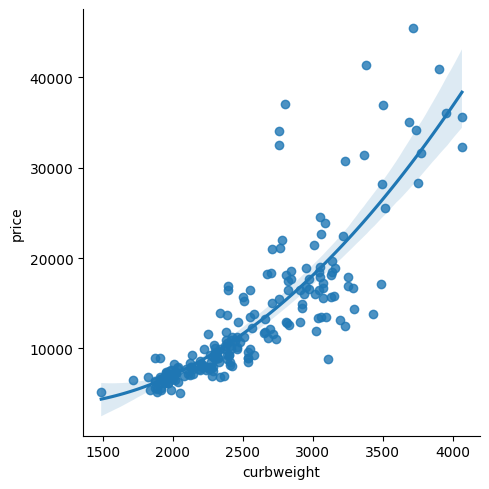

In [12]:
sns.lmplot(data=data, x='curbweight', y='price', order=2)

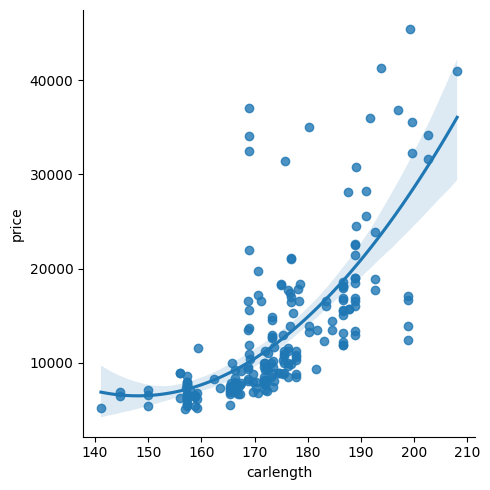

In [17]:
sns.lmplot(data=data, x='carlength', y='price', order=2)

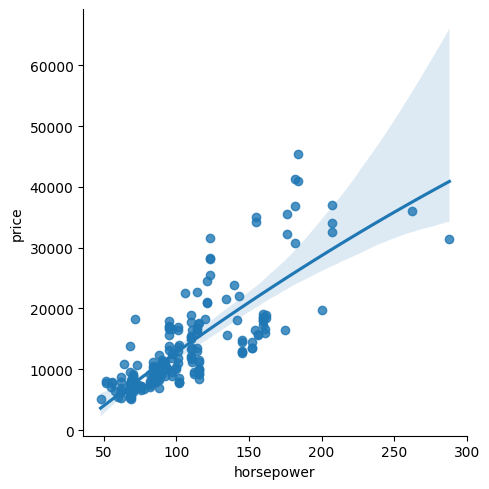

In [19]:
sns.lmplot(data=data, x='horsepower', y='price', order=2)

### Data Split

In [20]:
x = data.drop('price', axis=1)
y = data.price

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)
print(f"Number of test samples: {X_test.shape[0]}")
print(f"Number of training samples: {X_train.shape[0]}")

Number of test samples: 62
Number of training samples: 143


### Multiple Features

In [25]:
linearReg = LinearRegression()

In [26]:
linearReg

LinearRegression()

In [27]:
linearReg = linearReg.fit(X_train, y_train)

In [29]:
predicted = linearReg.predict(X_test)

Checking the r2 score on both training and testing datasets

In [31]:
print(f"R2 score of training data: {linearReg.score(X_train, y_train)}")
print(f"R2 score of testing data: {linearReg.score(X_test, y_test)}")

R2 score of training data: 0.9261981895971949
R2 score of testing data: 0.8500551011878996


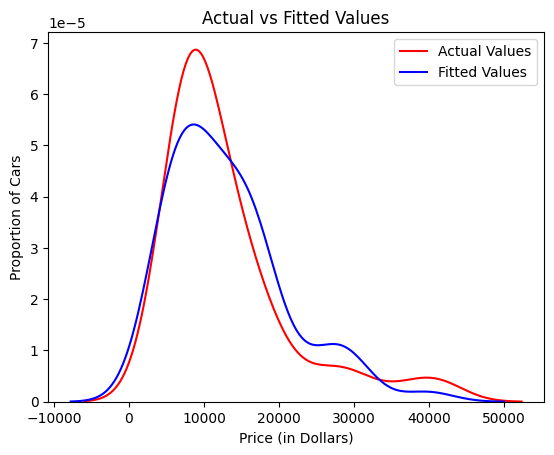

In [32]:
plot_dis(y_test, predicted)

Below are the fitted coefficients of the datasets

In [33]:
{col:coeff for (col, coeff) in zip(x.columns, linearReg.coef_)}

{'diesel': -1348733091931160.2,
 'gas': -1348733091932830.8,
 'std': 328.09636017791996,
 'turbo': -379.0415743673835,
 'convertible': 1754.235437293915,
 'hardtop': 3038.425405937796,
 'hatchback': -1726.915116536612,
 'sedan': -655.3274707371338,
 'wagon': -2409.074307082546,
 '4wd': -632.1716184519332,
 'fwd': -321.51861763260297,
 'rwd': 954.3270108498389,
 'dohc': 2460.105523267882,
 'dohcv': -13356.354667660296,
 'l': 2135.3973376499416,
 'ohc': 4619.6241388433,
 'ohcf': 6075.189965805647,
 'ohcv': -2664.358428925572,
 'rotor': 729.6254714929158,
 'eight': 9205.568023694754,
 'five': -2679.9390212080825,
 'four': -5283.668295516305,
 'six': -2115.911567126084,
 'three': 0.0029296875,
 'twelve': 144.64806138435134,
 'two': 729.6342605554158,
 'wheelbase': 99.61247779746205,
 'curbweight': 4.789142482173508,
 'enginesize': 23.503149010125764,
 'boreratio': -1809.3275275247115,
 'horsepower': 68.62591613088244,
 'carlength': -63.72227335557646,
 'carwidth': 577.0394096646708,
 'city

As we see, the first two coefficients are too large to plot, so we'll drop them and plot the rest of the coefficients.

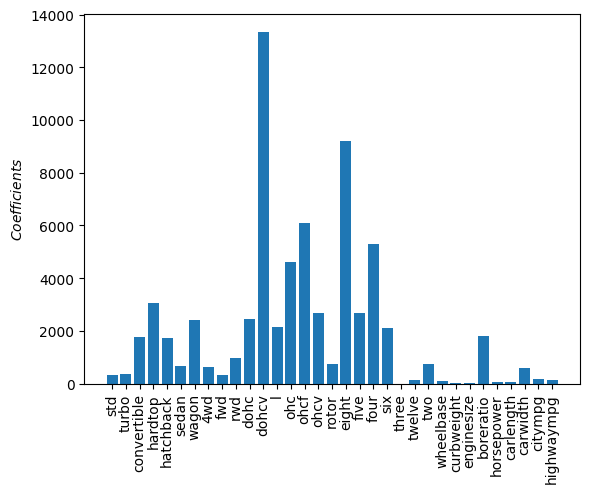

In [35]:
plt.bar(x.columns[2:], abs(linearReg.coef_[2:]))
plt.xticks(rotation=90)
plt.ylabel("$Coefficients$")
plt.show()

Usually, we can interpret the lager coefficients as having more importance on the prediction, but this is not always the case, so let's look at the individual features.


### Individual Features

We can train the model and plot our $R^2$ for each of the features on the training and testing data sets, using the function <code>get_R2\_features</code>.


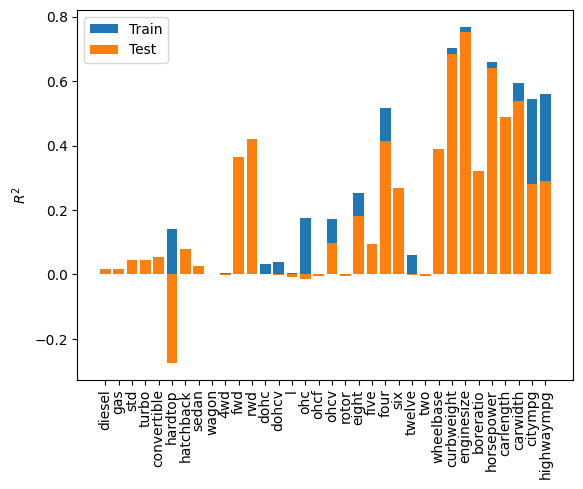

Training R^2 mean value 0.21817773426877915 Testing R^2 mean value 0.18241493035139267 
Training R^2 max value 0.7686929078033781 Testing R^2 max value 0.7534902447506853 


In [44]:
get_R2_features(linearReg)

From the above plot, we see that some individual features perform similarly to using all the features (we removed the feature three ), in addition, we see that smaller coefficients seem to correspond to a larger 
, therefore larger coefficients correspond to overfiting.

R2 on training data: 0.9262722224294516
R2 on testing data: 0.8419174509630335


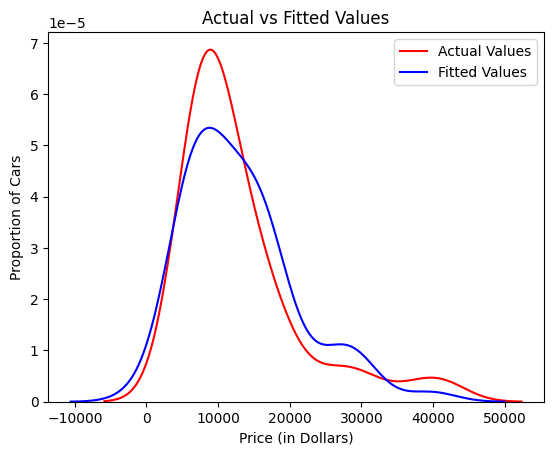

In [46]:
# Exercise
steps = [('scaler',StandardScaler()),('linearReg', LinearRegression())]
pipe = Pipeline(steps=steps)
pipe.fit(X_train, y_train)
print(f"R2 on training data: {pipe.score(X_train, y_train)}")
print(f"R2 on testing data: {pipe.score(X_test, y_test)}")
predicted = pipe.predict(X_test)
plot_dis(y_test, predicted)

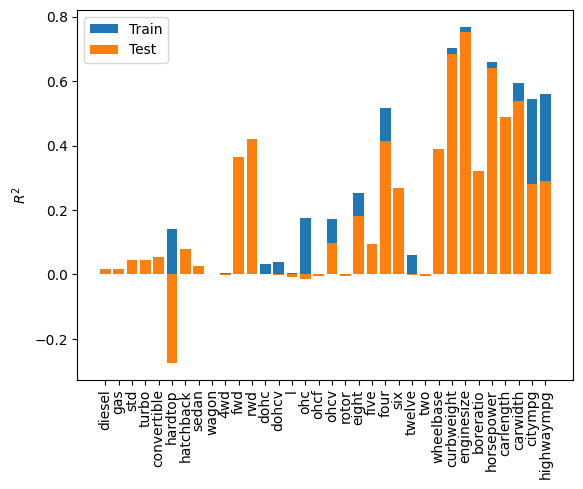

Training R^2 mean value 0.21817773426877915 Testing R^2 mean value 0.18241493035139267 
Training R^2 max value 0.7686929078033782 Testing R^2 max value 0.7534902447506853 


In [47]:
# Exercise

pipe = Pipeline(steps=[('scaler', StandardScaler()),('linearReg', LinearRegression())])
get_R2_features(pipe)

## Polynomial Features

### Mulitple Features

Polynomial transform is a simple way to increase the complexity of the model, but we must be mindful of overfilling. Below, we will perform a second degree (degree=2) polynomial transformation.

In [48]:
polyFeat = PolynomialFeatures(degree=2, include_bias=False)

In [49]:
X_train_poly = polyFeat.fit_transform(X_train)
X_test_poly = polyFeat.transform(X_test)

In [50]:
print(X_train.shape)
print(X_train_poly.shape)

(143, 35)
(143, 665)


In [51]:
print(X_test.shape)
print(X_test_poly.shape)

(62, 35)
(62, 665)


In [52]:
linearReg = LinearRegression()
linearReg.fit(X_train_poly, y_train)

LinearRegression()

In [53]:
predicted = linearReg.predict(X_test_poly)

In [54]:
print(f"R2 on training data: {linearReg.score(X_train_poly, y_train)}")
print(f"R2 on training data: {linearReg.score(X_test_poly, y_test)}")

R2 on training data: 0.9985318497975851
R2 on training data: -36729.95729216158


As we can see the model has a negative sign, this means the model has overfitted.

### Individual Features

In [56]:
steps = [('polyFeat', PolynomialFeatures(degree=2, include_bias=False)),('linearReg', LinearRegression())]

pipe = Pipeline(steps=steps)
pipe.fit(X_train, y_train)

Pipeline(steps=[('polyFeat', PolynomialFeatures(include_bias=False)),
                ('linearReg', LinearRegression())])

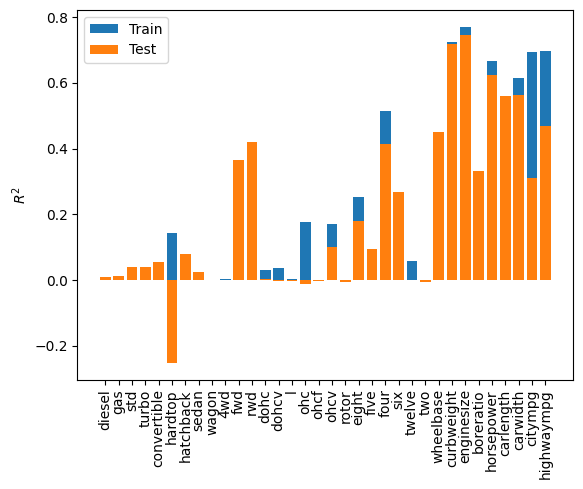

Training R^2 mean value 0.2306865256222299 Testing R^2 mean value 0.194039329276013 
Training R^2 max value 0.7706959974452947 Testing R^2 max value 0.7463370080614307 


In [57]:
get_R2_features(pipe)

Feature with the max $R^{2}$ is higher than when using all the features.


### GridSearch and Pipeline

In this section of the notebook, we will define a pipeline object, then use GridSearch to find the best hyper-parameters of the model by using cross-validation method of the parameter grid, as shown in the figure below. A 5-fold cross validation is used by default. We will learn more about k-fold cross validation in the next, Cross Validation lesson of the Course.

<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/images/k-fold.png">
</center>
<center>source scikit-learn.org</center>

We create a ```PolynomialFeatures()``` object

In [60]:
steps = [('polyFeat', PolynomialFeatures(degree=2, include_bias=False)), ('scaler', StandardScaler()), ('linearReg', LinearRegression())]
pipe = Pipeline(steps=steps)

In [82]:
param_grid = {
    "polyFeat__degree" : [1, 2, 3],
}
# Whatever variable name is given in the pipeline, has to be given in the param_grid as well, otherwise won't work., followed by 2 underscores
# and the parameter name, here it is degree

In [83]:
search = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs=1)

In [84]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('polyFeat', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('linearReg', LinearRegression())])

In [85]:
search.fit(X_test, y_test)

GridSearchCV(estimator=Pipeline(steps=[('polyFeat',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('linearReg', LinearRegression())]),
             n_jobs=1, param_grid={'polyFeat__degree': [1, 2, 3]})

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable best, as follows:

In [86]:
best = search.best_estimator_
best

Pipeline(steps=[('polyFeat', PolynomialFeatures(degree=1, include_bias=False)),
                ('scaler', StandardScaler()),
                ('linearReg', LinearRegression())])

In [87]:
best.score(X_test, y_test)

0.9594017223638897

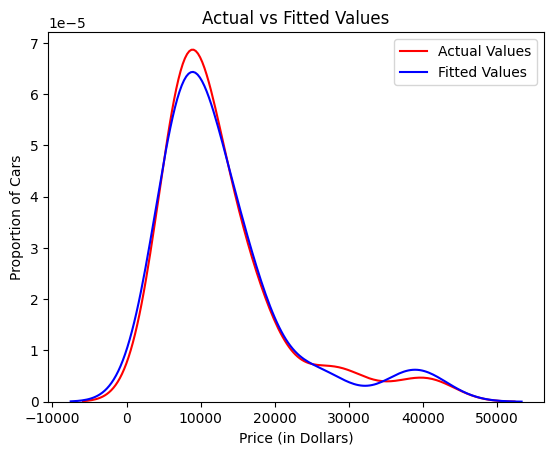

In [88]:
predicted = best.predict(X_test)
plot_dis(y_test, predicted)

## Exercise 4

In this Exercise, calculate the $R^2$ using the object `Pipeline` with `GridSearch` for each individual features.


diesel
gas
std
turbo
convertible
hardtop
hatchback
sedan
wagon
4wd
fwd
rwd
dohc
dohcv
l
ohc
ohcf
ohcv
rotor
eight
five
four
six
three
twelve
two
wheelbase
curbweight
enginesize
boreratio
horsepower
carlength
carwidth
citympg
highwaympg


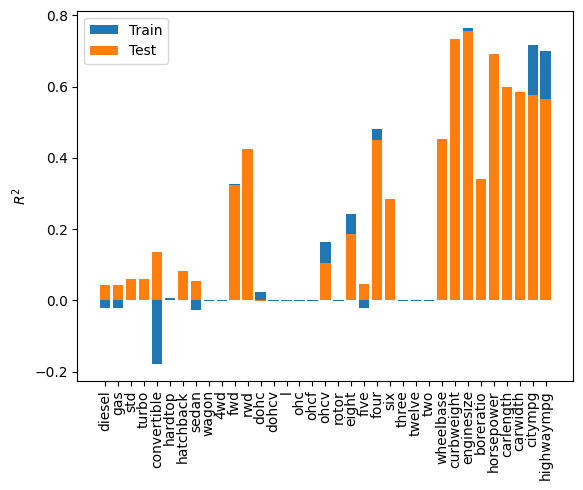

Training R^2 mean value 0.18469498230987366 Testing R^2 mean value 0.2171561572559849 
Training R^2 max value 0.765323637379124 Testing R^2 max value 0.7565151400968062 


In [90]:
# Enter your code and run the cell

features=list(x)


R_2_train=[]
R_2_test=[]

for feature in features:
    param_grid = {
    "polynomial__degree": [ 1, 2,3,4,5],
    "model__positive":[True, False]}
    Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model',LinearRegression())]
    pipe=Pipeline(Input)
    print(feature)
    search = GridSearchCV(pipe, param_grid, n_jobs=2)
    search.fit(X_test[[feature]], y_test)
    best=search.best_estimator_

    R_2_test.append(best.score(X_test[[feature]],y_test))
    R_2_train.append(best.score(X_train[[feature]],y_train))


plt.bar(features,R_2_train,label="Train")
plt.bar(features,R_2_test,label="Test")
plt.xticks(rotation=90)
plt.ylabel("$R^2$")
plt.legend()
plt.show()
print("Training R^2 mean value {} Testing R^2 mean value {} ".format(str(np.mean(R_2_train)),str(np.mean(R_2_test))) )
print("Training R^2 max value {} Testing R^2 max value {} ".format(str(np.max(R_2_train)),str(np.max(R_2_test))) )